
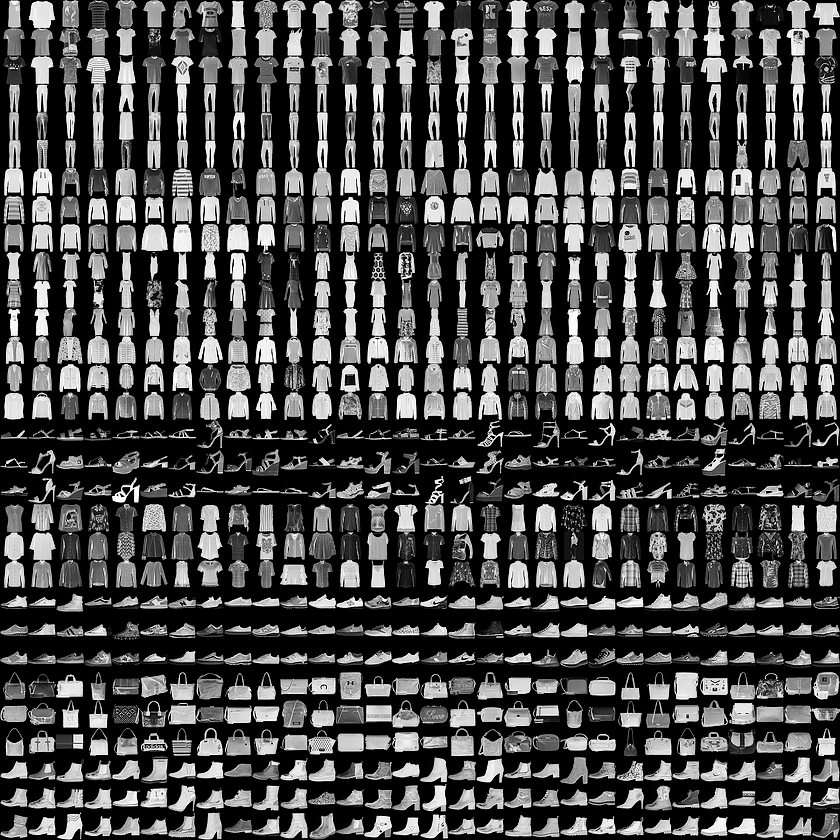


<font color= purple> <h1> <u>Fashion-MNIST </u></h1> </font>
<h4> Fashion-MNIST is a dataset of Zalando's fashion article images. Each example is a 28x28 grayscale image, associated with a label(0-9).

#### ABOUT THE DATASET    
Our dataset consists of 60,000 images for training data and 10000 images for test data and each image has 784 features. An image consists of 28x28 pixels, and each pixel is a value from 0 to 255 describing the pixel intensity. 0 for white and 255 for black.

#### DATA FIELDS
-Image: A 2d array of integers representing the 28x28 image.
    
-Label: An integer between 0 and 9 representing the classes with the following mapping:

#### AIM
Our task is to train and build a model using the training dataset that will be able to Classify the items of the test dataset into the specific clothing item category with the highest accuracy</h4>

<h2><font color=blue> Exploring Dataset </font> </h2>
<h4> 1.1 Importing the libraries </h4>

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score,roc_auc_score,accuracy_score

<h4> 1.2 Extracting the Data </h4>

In [4]:
train_data = pd.read_csv("fashion-mnist_train.csv")
test_data = pd.read_csv("fashion-mnist_test.csv")

In [5]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [148]:
train_data.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [149]:
test_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [150]:
test_data.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


<h4> 1.3 Features </h4>

<b>Label: The Target variable.

Pixels: The smallest unit of a Digital Image or Graphic that can be displayed on Digital Display Device.

Where humans can see the objects due to the Light Receptors in their Eyes which send Signals via the Optic Nerve to the Primary Visual Cortex, where the input is processed ,

Computers on the other hand, see the Image as 2-dimensional arrays of numbers, known as pixels. They Classify Images based on Boundaries and Curvatures of the Object (Represented by pixel values, either RGB or GrayScale) .

This is the Partial View of the Labels and the Dataset.

 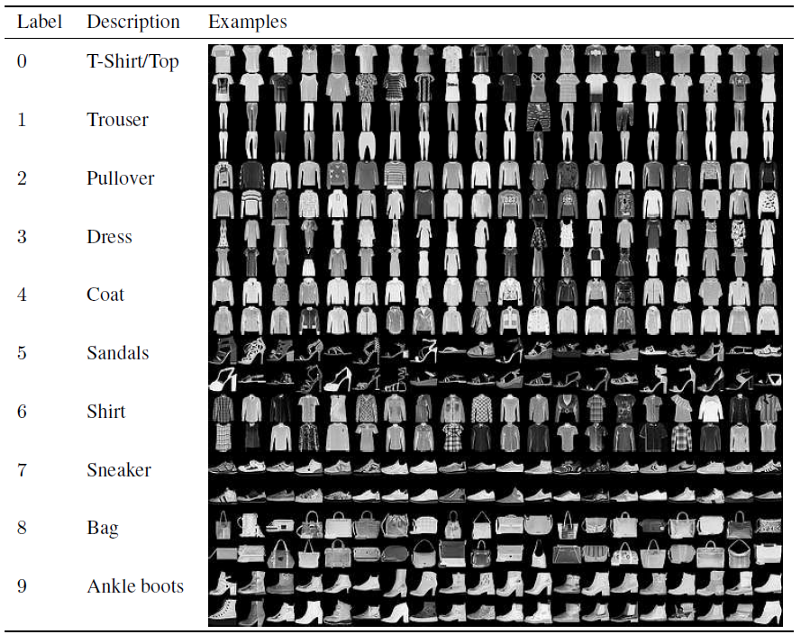

<h4> 1.4 Examining the shape and dimensions of dataset </h4>

In [7]:
df=train_data.copy()
df_test = test_data.copy()

In [8]:
df.shape

(60000, 785)

In [9]:
df_test.shape

(10000, 785)

In [10]:
df.label.unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1], dtype=int64)

In [151]:
df_test.label.unique()

array([0, 1, 2, 3, 8, 6, 5, 4, 7, 9], dtype=int64)

<b>So, there are 60,000 Training Samples and 10,000 Test Samples.
    
1.Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    
2.Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker.    
3.This pixel-value is an integer between 0 and 255, inclusive.

The first column of the Training Samples consists of Class Labels and represents the article of Clothing.

<h4> 1.5 Examining the NaN values </h4>

In [11]:
df.isnull().any().sum()

0

In [12]:
df_test.isnull().any().sum()

0

<b>Great!! There are no NaN values in train or test dataset

<h2><font color=blue> Exploratory Data Analysis </font> </h2>
<h4> 2.1 Visualisation of the Dataset </h4>

In [13]:
# Mapping Classes
clothing = {0 : 'T-shirt/top',
            1 : 'Trouser',
            2 : 'Pullover',
            3 : 'Dress',
            4 : 'Coat',
            5 : 'Sandal',
            6 : 'Shirt',
            7 : 'Sneaker',
            8 : 'Bag',
            9 : 'Ankle boot'}

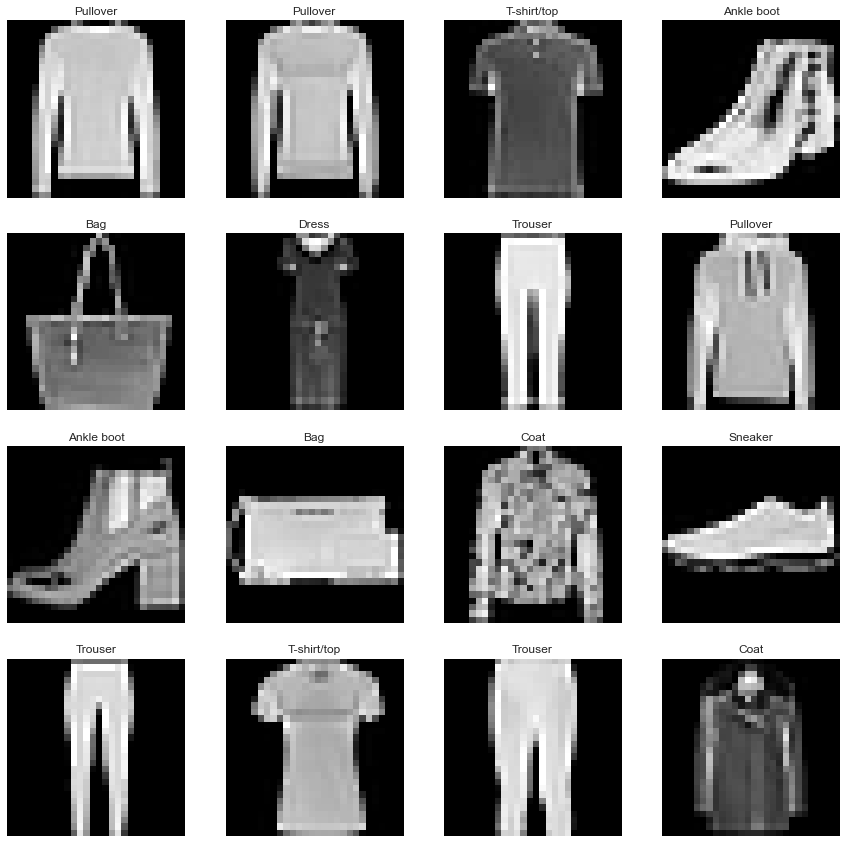

In [14]:
fig, axes = plt.subplots(4, 4, figsize = (15,15))
for row in axes:
    for axe in row:
        index = np.random.randint(60000)
        img = df.drop('label', axis=1).values[index].reshape(28,28)
        cloths = df['label'][index]
        axe.imshow(img, cmap='gray')
        axe.set_title(clothing[cloths])
        axe.set_axis_off()

<h4> 2.2 Distribution of labels </h4>

In [15]:
df['label'].value_counts()

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: label, dtype: int64

In [152]:
df_test['label'].value_counts()

0    1000
8    1000
1    1000
9    1000
2    1000
3    1000
4    1000
5    1000
6    1000
7    1000
Name: label, dtype: int64

C:\Users\AMRUTA DESAI\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\AMRUTA DESAI\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


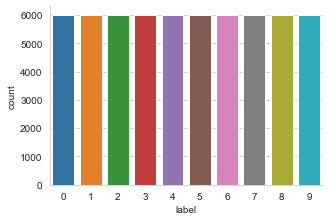

In [16]:
sns.factorplot(x='label', data=df, kind='count', size=3, aspect= 1.5)

<b>Labels :

0 - T-shirt/top
    
1 - Trouser    
2 - Pullover    
3 - Dress    
4 - Coat    
5 - Sandals   
6 - Shirt    
7 - Sneaker    
8 - Bag    
9 - Ankle Boots

<b>We can see that all classes are equally Distributed.
So, there is no need for OverSampling or UnderSampling.

<h2><font color=blue>Training Models Using Various Algorithm </font></h2>

<h3>3.1.Model Building Using Logistic Regression </h3>

In [111]:
y_train = train_data.iloc[:,0]
x_train = train_data.iloc[:,1:]

y_test = test_data.iloc[:,0]
x_test = test_data.iloc[:,1:]

In [113]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [100]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)

C:\Users\AMRUTA DESAI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [114]:
Y_pred=log.predict(x_test)
Y_pred[0:10]

array([0, 1, 2, 0, 4, 6, 8, 6, 5, 0], dtype=int64)

In [115]:
LogReg = accuracy_score(y_test,Y_pred)
print(LogReg*100,"%")

85.44 %


<h3>3.2.Building Model Using Support Vector </h3>

In [116]:
y_train = train_data.iloc[:,0]
x_train = train_data.iloc[:,1:]

y_test = test_data.iloc[:,0]
x_test = test_data.iloc[:,1:]

In [117]:
from sklearn import svm
from sklearn.svm import SVC

In [118]:
lin_svc=svm.LinearSVC(C=C)
lin_svc.fit(x_train,y_train)

C:\Users\AMRUTA DESAI\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [119]:
Y_pred2=lin_svc.predict(x_test)
Y_pred2[0:10]

array([6, 1, 6, 2, 4, 6, 8, 6, 5, 0], dtype=int64)

In [120]:
StVt = accuracy_score(y_test,Y_pred2)
print(StVt*100, "%")

78.96 %


<h3>3.3.Building Model Using Random Forest </h3>

In [121]:
y_train = train_data.iloc[:,0]
x_train = train_data.iloc[:,1:]

y_test = test_data.iloc[:,0]
x_test = test_data.iloc[:,1:]

In [122]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=50, random_state=42)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=50, random_state=42)

In [123]:
Y_pred3=rf.predict(x_test)
Y_pred3[0:10]

array([0, 1, 2, 2, 3, 6, 8, 6, 5, 0], dtype=int64)

In [124]:
Rfc = accuracy_score(y_test,Y_pred3)
print(Rfc*100,"%")

88.47 %


In [126]:
Rfc_recall = recall_score(y_test,Y_pred3,average="weighted")
print(Rfc_recall*100,"%")
Rfc_precision=precision_score(y_test,Y_pred3,average="weighted")
print(Rfc_precision*100, "%")
Rfc_f1score = f1_score(y_test,Y_pred3,average="weighted")
print(Rfc_f1score*100,"%")

88.47 %
88.33458509349599 %
88.302258751592 %


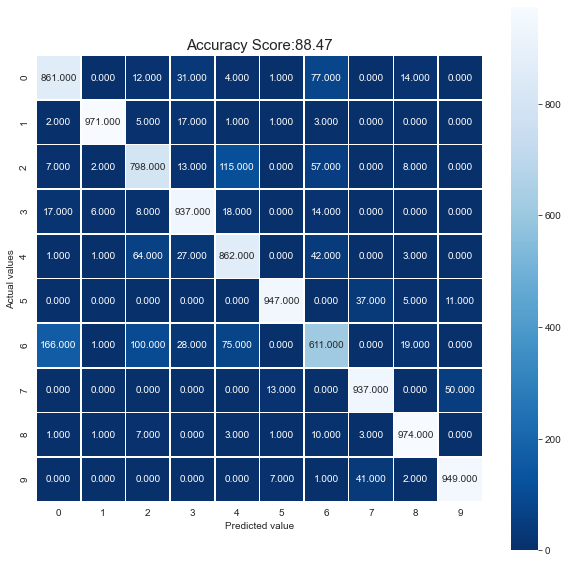

In [127]:
cm = metrics.confusion_matrix(y_test,Y_pred3)
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='.3f',linewidth=0.5,square=True,cmap='Blues_r')
plt.xlabel('Predicted value')
plt.ylabel('Actual values')
all_sampl_title= 'Accuracy Score:{0}' .format(Rfc*100)
plt.title(all_sampl_title,size=15);

In [128]:
print(classification_report(y_test,Y_pred3))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.80      0.80      0.80      1000
           3       0.89      0.94      0.91      1000
           4       0.80      0.86      0.83      1000
           5       0.98      0.95      0.96      1000
           6       0.75      0.61      0.67      1000
           7       0.92      0.94      0.93      1000
           8       0.95      0.97      0.96      1000
           9       0.94      0.95      0.94      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



<h3> 3.4 Building Model Using XGBoost Classifier </h3>

In [130]:
import xgboost as xgb
from xgboost import XGBClassifier

In [131]:
y_train = train_data.iloc[:,0]
x_train = train_data.iloc[:,1:]

y_test = test_data.iloc[:,0]
x_test = test_data.iloc[:,1:]

In [132]:
xgb_clf=XGBClassifier(n_estimators=20,max_depth=10,random_state=42)
xgb_clf.fit(x_train,y_train)

C:\Users\AMRUTA DESAI\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:28:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=20, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [133]:
Y_pred4=xgb_clf.predict(x_test)
Y_pred4[0:10]

array([0, 1, 2, 2, 3, 6, 8, 6, 5, 0], dtype=int64)

In [134]:
xgbc= accuracy_score(y_test,Y_pred4)
print(xgbc*100,"%")

89.11 %


In [135]:
xgbc_recall = recall_score(y_test,Y_pred4,average="weighted")
print(xgbc_recall*100,"%")
xgbc_precision=precision_score(y_test,Y_pred4,average="weighted")
print(xgbc_precision*100, "%")
xgbc_f1score = f1_score(y_test,Y_pred4,average="weighted")
print(xgbc_f1score*100,"%")

89.11 %
89.02759783559699 %
89.04541653554534 %


In [136]:
print(classification_report(y_test,Y_pred4))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.99      0.98      0.98      1000
           2       0.82      0.81      0.82      1000
           3       0.90      0.92      0.91      1000
           4       0.83      0.85      0.84      1000
           5       0.97      0.95      0.96      1000
           6       0.73      0.67      0.70      1000
           7       0.93      0.94      0.94      1000
           8       0.96      0.97      0.97      1000
           9       0.95      0.96      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



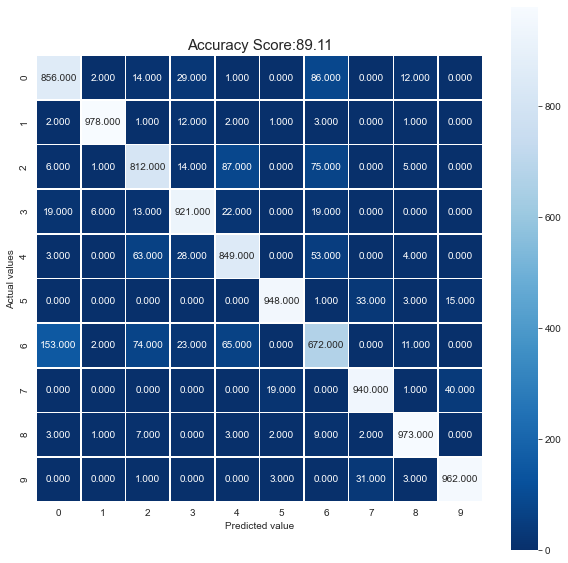

In [137]:
cm = metrics.confusion_matrix(y_test,Y_pred4)
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='.3f',linewidth=0.5,square=True,cmap='Blues_r')
plt.xlabel('Predicted value')
plt.ylabel('Actual values')
all_sampl_title= 'Accuracy Score:{0}' .format(xgbc*100)
plt.title(all_sampl_title,size=15);

<b>Precision:
Precision is the ability of a classifier not to label an instance positive that is actually negative. Basically, it is defined as as the ratio of true positives to the sum of true and false positives. “For all instances classified positive, what percent was correct?”

    
<b>Recall:
Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives. “For all instances that were actually positive, what percent was classified correctly?"

F1 Score:
The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0 . Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation.



<h2><font color=blue> Verifying the Obtained Results </font></h2>

<h3><b> 4.1 Verifying the random forest classifer </h3>

<h4> Thus we see that 8847 labels are corrected predicted out of 10000 making it 88.4% accurate. </h4> 

In [138]:
index=0
classifiedIndex = []
for predict,actual in zip(Y_pred3,y_test):
    if predict==actual:
        classifiedIndex.append(index)
        index+=1

In [139]:
print(len(classifiedIndex))

8847


In [142]:
index=0
classifiedIndex = []
for predict,actual in zip(Y_pred3,y_test):
    if predict!=actual:
        classifiedIndex.append(index)
        index+=1

In [143]:
print(len(classifiedIndex))

1153


<h3><b> 4.2 Verifying the XGBoost Classifier </h3>

<h4> Here 8911 labels out of 10000 are corrected predicted making it 89.1% accurate.</h4>

In [144]:
index=0
classifiedIndex = []
for predict,actual in zip(Y_pred4,y_test):
    if predict==actual:
        classifiedIndex.append(index)
        index+=1

In [145]:
print(len(classifiedIndex))

8911


In [146]:
index=0
classifiedIndex = []
for predict,actual in zip(Y_pred4,y_test):
    if predict!=actual:
        classifiedIndex.append(index)
        index+=1

In [147]:
print(len(classifiedIndex))

1089


<h3> <b>By implementing the various classifier algorithm , 

I achieved the following accuracies: 
    
XGBoost Classifier(89.1%)

Random Forest Classifier(88.4%) 

Logistic Regression Classifier(85.44%) 

Support Vector Machine Classifier(78.96%)</h3>